In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [2]:
import numpy as np
import matplotlib.pyplot as plt

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = {'equipos': equipos, 'bateos': bateos, 'runs': runs}

In [3]:
# Desafío I: dado el diccionario con los datos de partidos anteriores crea un DataFrame de nombre datos_partidos_previos
datos_partidos_previos = pd.DataFrame(datos)
print(datos_partidos_previos.head())

   equipos  bateos  runs
0    Texas    5659   855
1   Boston    5710   875
2  Detroit    5563   787
3   Kansas    5672   730
4      St.    5532   762


<AxesSubplot:xlabel='bateos', ylabel='runs'>

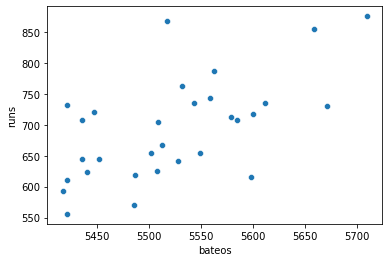

In [14]:
# Desafío II: graficá el número de bateos vs el numero de runs, para observar la relación entre ambas variables
sns.scatterplot(data=datos_partidos_previos, x="bateos", y="runs")

In [15]:
# evaluar numericamente si existe la correlacion que se ve en el grafico
from scipy.stats import pearsonr

corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206687
P-value:  0.0003388351359791978


In [18]:
# divido los datos en dos grupos (entregnamiento y test) para cuantificar su capacidad de predecir
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = datos_partidos_previos[['bateos']]
y = datos_partidos_previos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [19]:
# valores de ordenada al origen (intercept_) y toda la información de nuestro modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


In [20]:
# evaluar la capacidad predictiva usando el conjunto de test:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]


In [21]:
# error rmse del test
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 59.336716083360486


In [ ]:
# Desafío III: Calculá el valor normalizado el RMSE
# formula: RMSE_normalizado = RMSE / (valor máximo - valor mínimo)
rmse_normalizado = rmse / ("""valor min y max??????""")